In [1]:
from src.pre_procesamiento.transformar_datos_para_analisis_descriptivo import (
  VARS_NUMERICAS,
  VARS_CATEGORICAS,
  etiquetar_vacios_en_train_y_test
)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar datos de entrenamiento y de test, donde los vacíos de las
# variables categóricas han sido reemplazados por '?'
datos_train, datos_test = etiquetar_vacios_en_train_y_test()

In [3]:
datos_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education-num   32561 non-null  int64   
 5   marital-status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital-gain    32561 non-null  int64   
 11  capital-loss    32561 non-null  int64   
 12  hours-per-week  32561 non-null  int64   
 13  native-country  32561 non-null  category
 14  class           32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


In [4]:
datos_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 32561 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             16281 non-null  int64   
 1   workclass       16281 non-null  category
 2   fnlwgt          16281 non-null  int64   
 3   education       16281 non-null  category
 4   education-num   16281 non-null  int64   
 5   marital-status  16281 non-null  category
 6   occupation      16281 non-null  category
 7   relationship    16281 non-null  category
 8   race            16281 non-null  category
 9   sex             16281 non-null  category
 10  capital-gain    16281 non-null  int64   
 11  capital-loss    16281 non-null  int64   
 12  hours-per-week  16281 non-null  int64   
 13  native-country  16281 non-null  category
 14  class           16281 non-null  category
dtypes: category(9), int64(6)
memory usage: 910.5 KB


In [5]:
# Reconstruir el conjunto de datos
datos = pd.concat([datos_train, datos_test], ignore_index = True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       48842 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      48842 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  48842 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


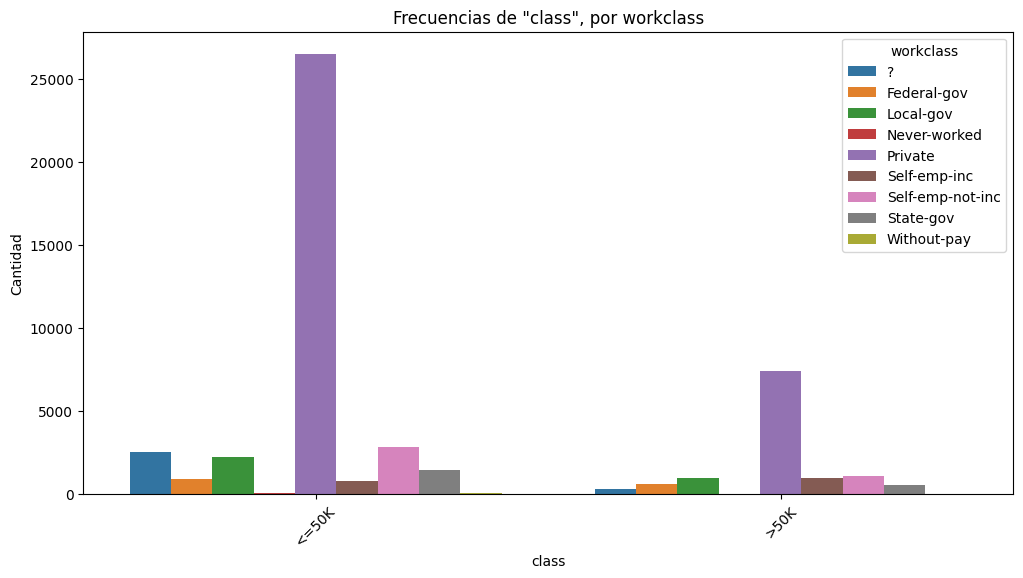

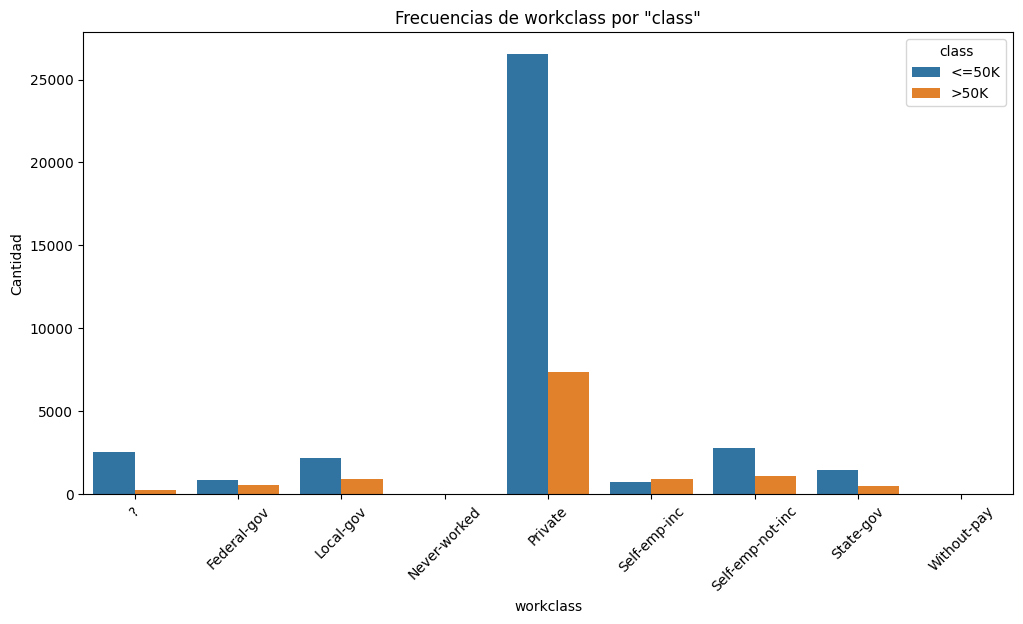

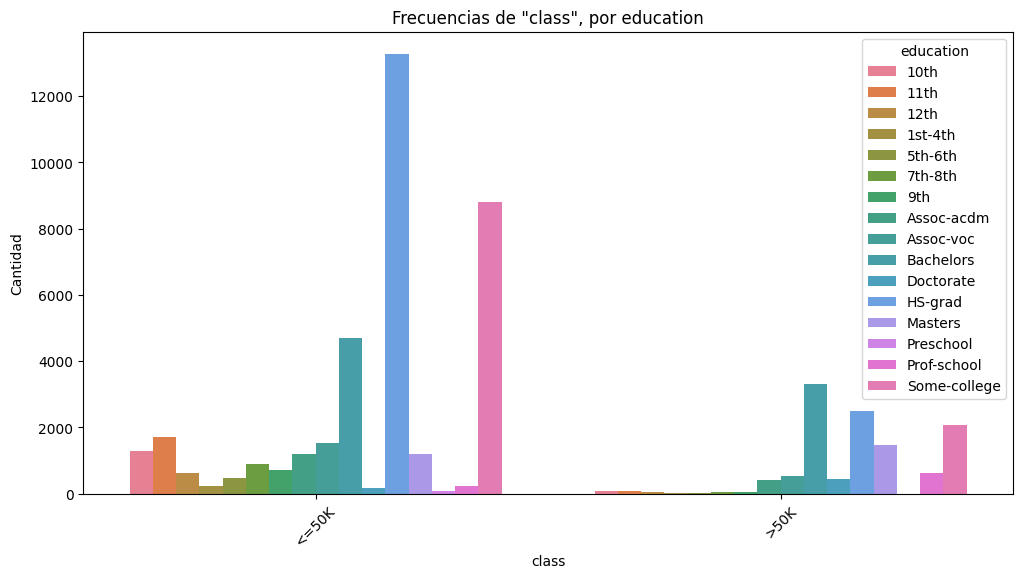

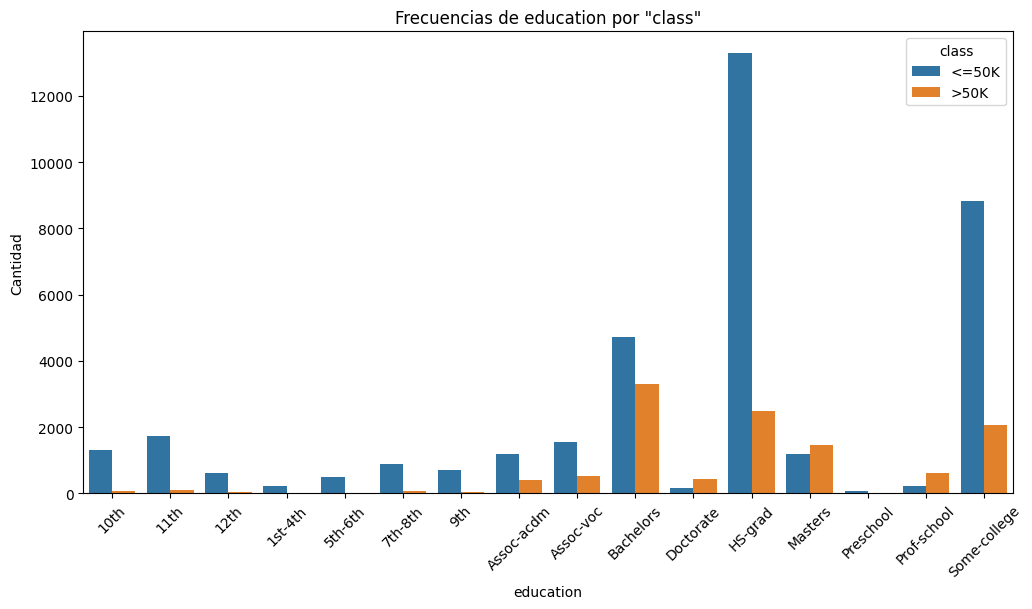

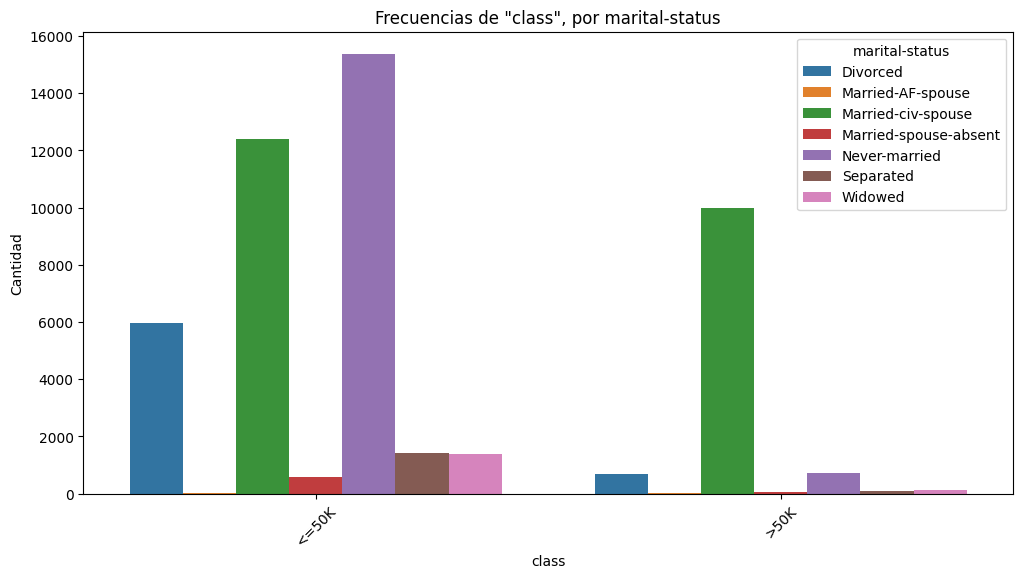

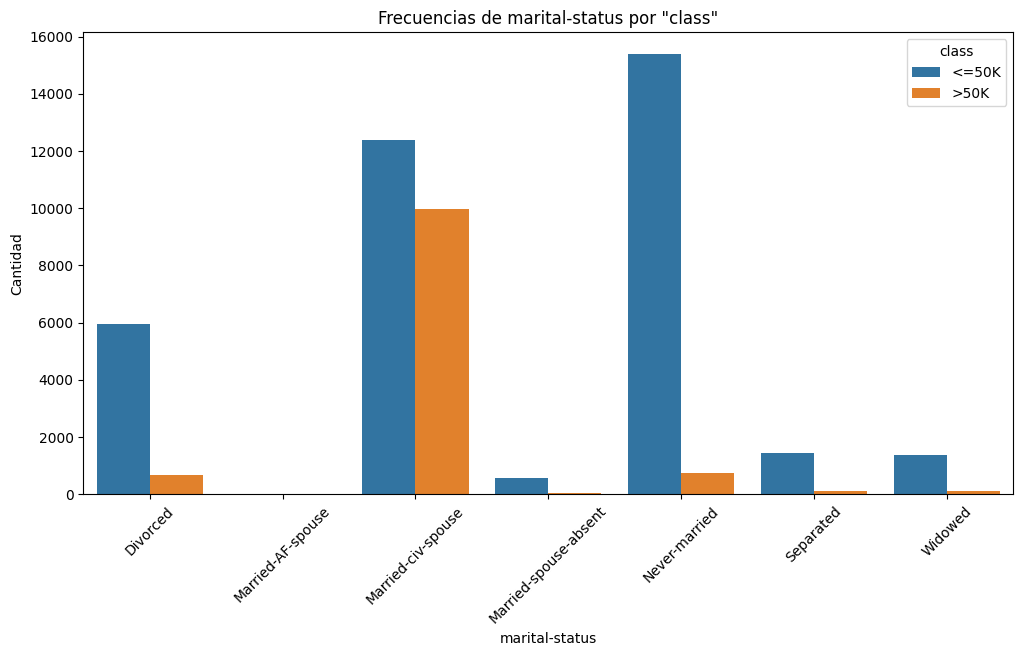

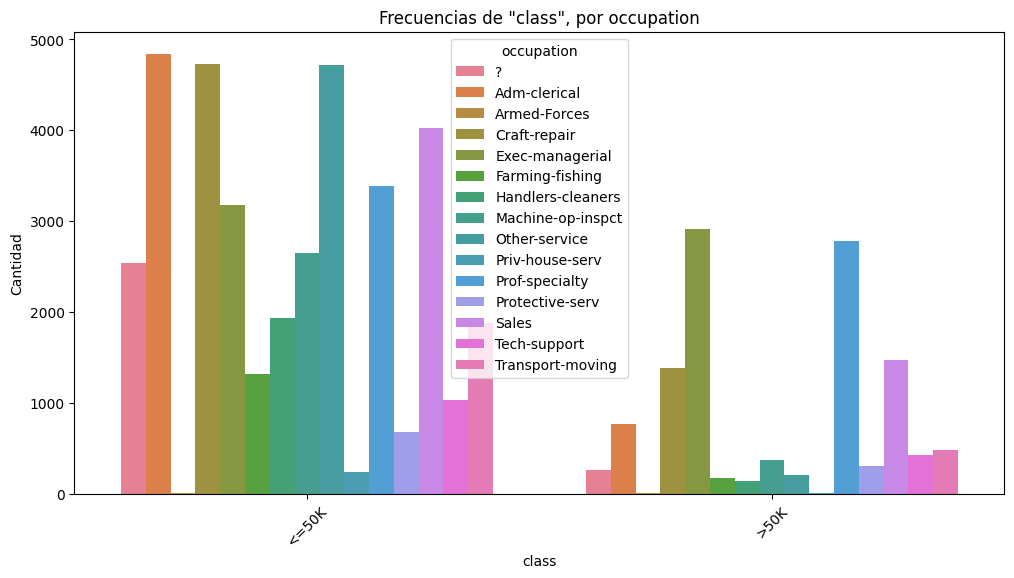

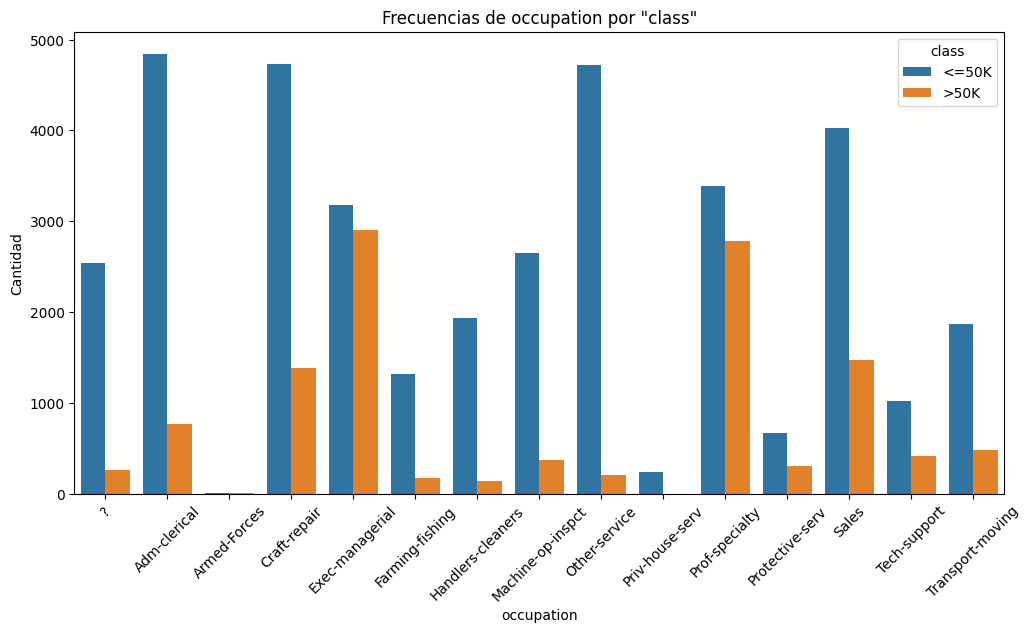

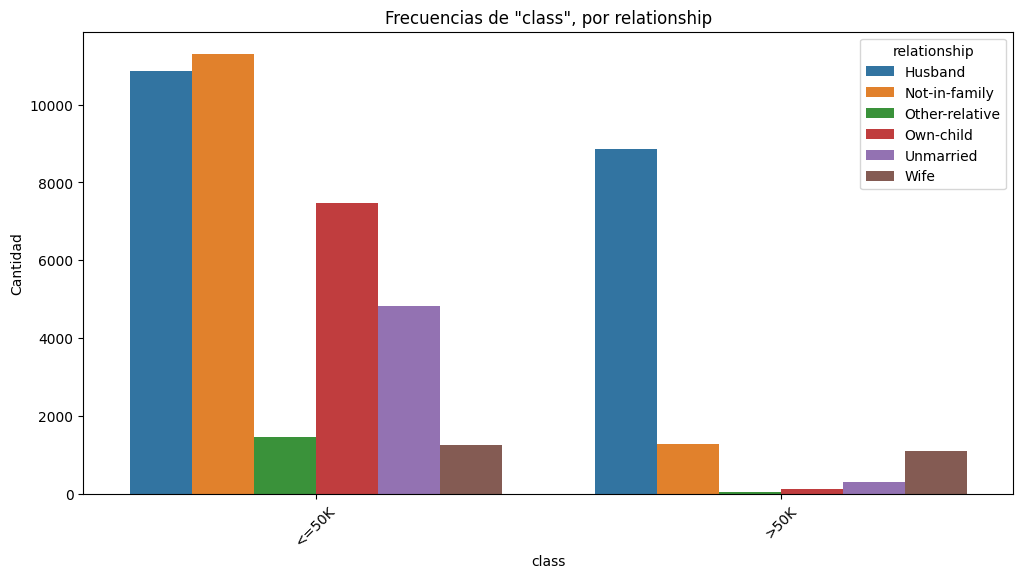

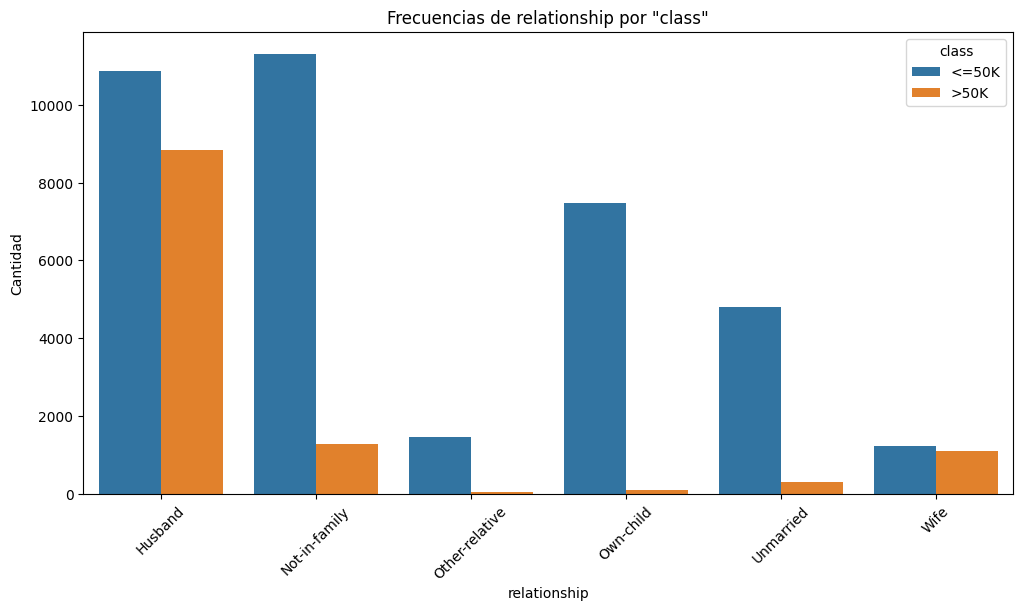

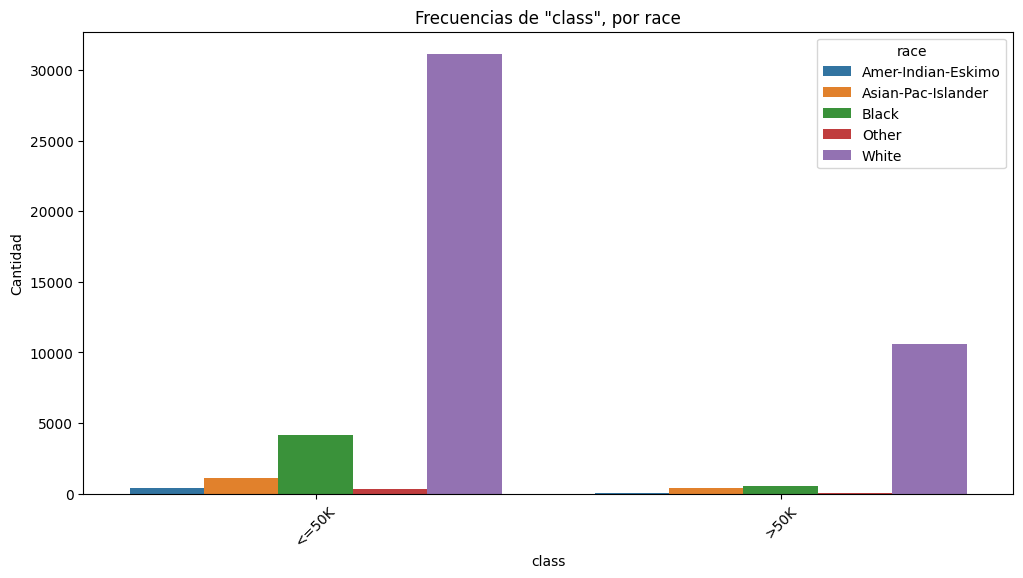

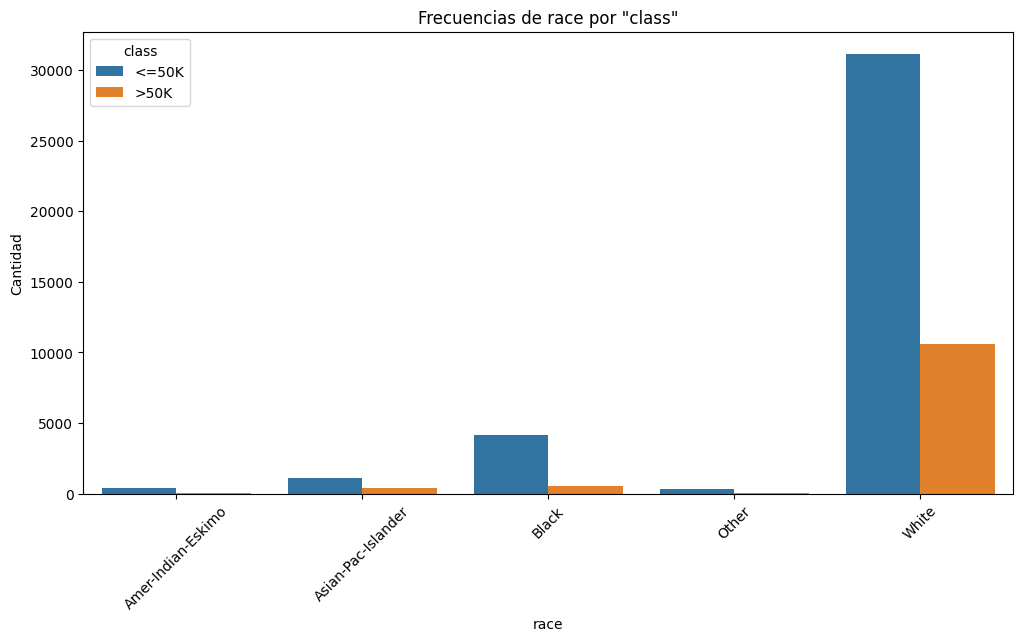

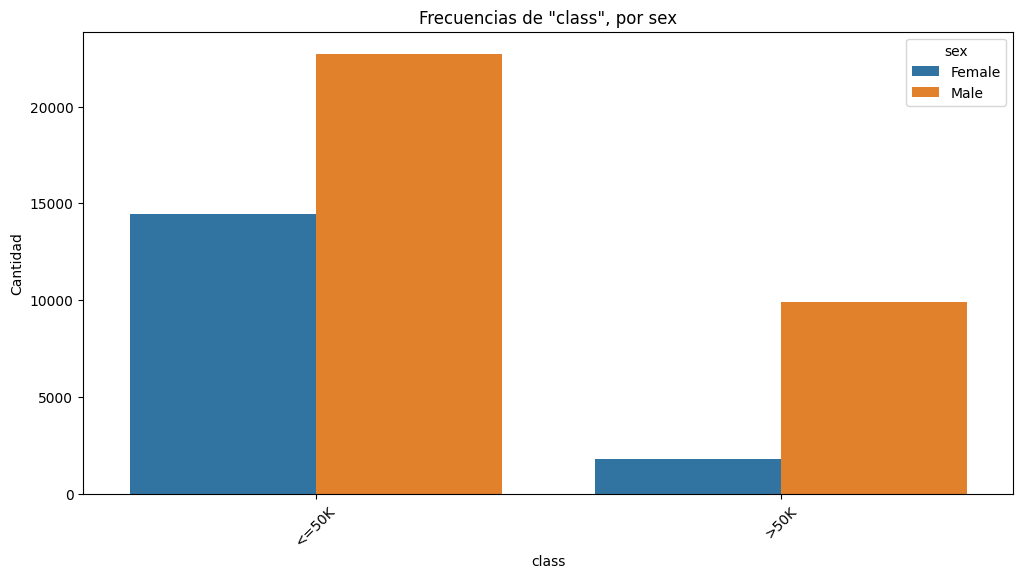

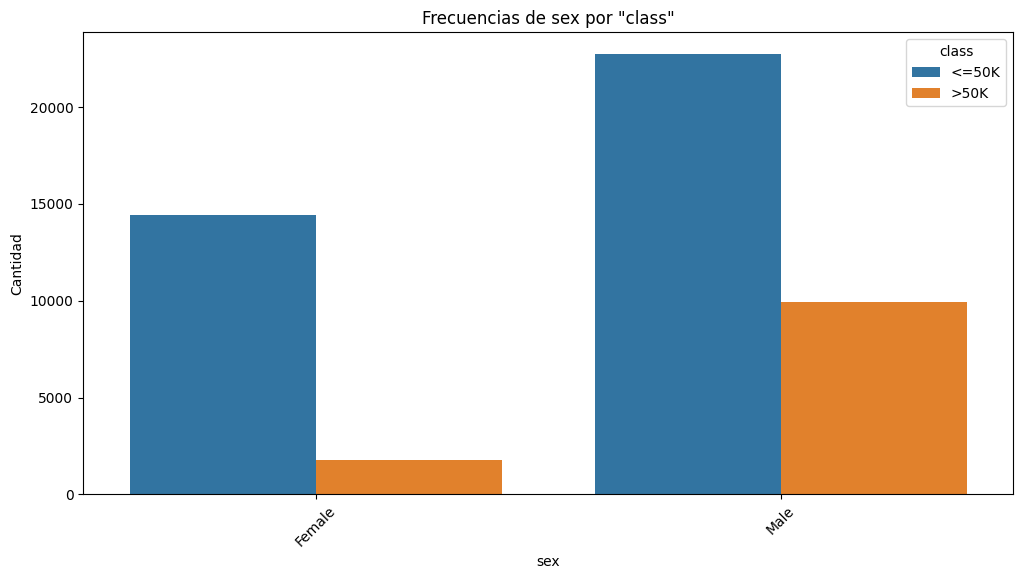

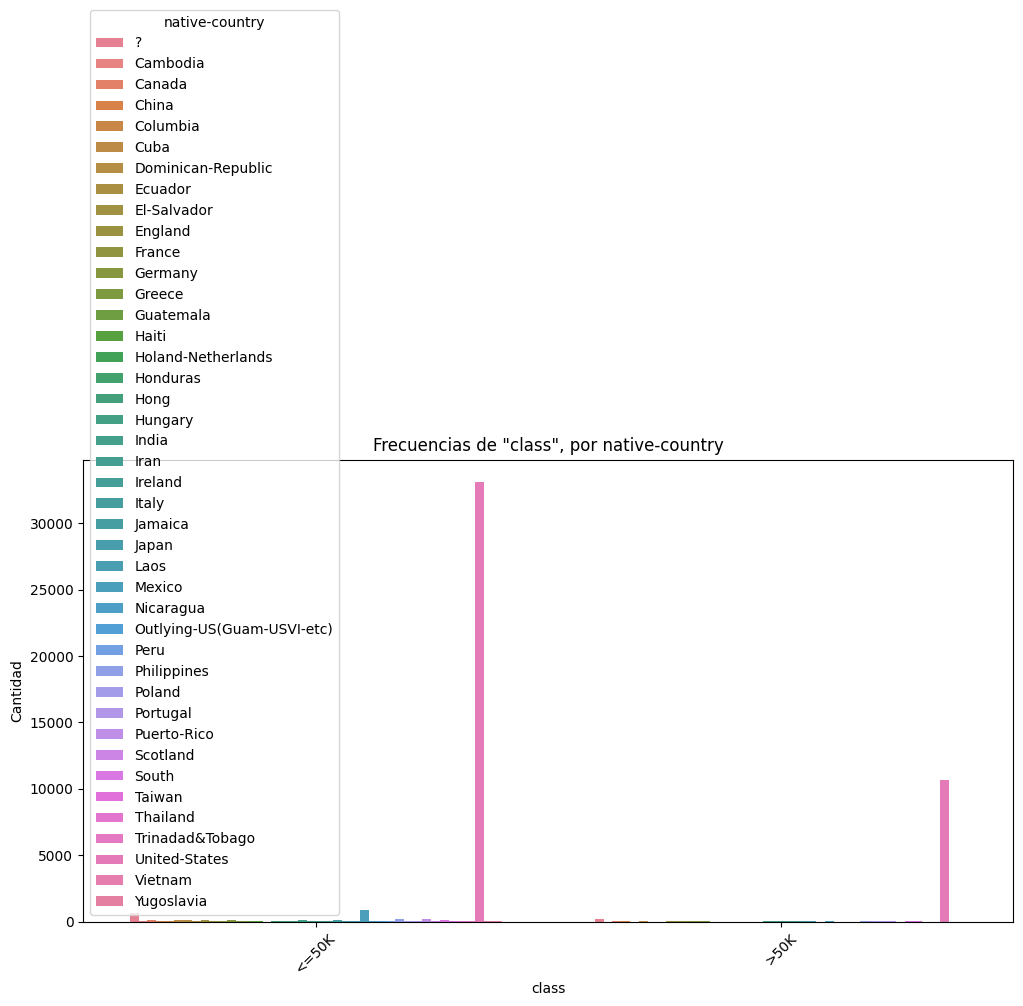

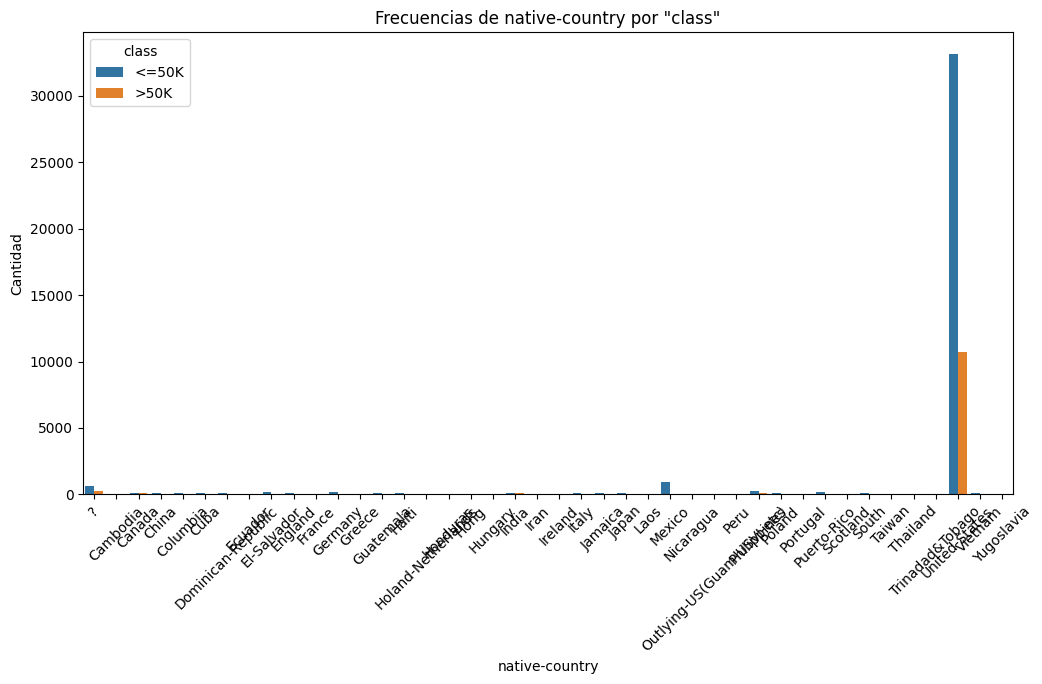

In [6]:
"""
Comparar variables categóricas con la variable por predecir
"""
for var_cat in VARS_CATEGORICAS:
  if var_cat == 'class': continue

  frecuencias = datos.groupby(['class', var_cat]).size().reset_index(name = 'Cantidad')

  # Frecuencias de 'class' en cada variable categórica diferente
  plt.figure(figsize = (12, 6))
  sns.barplot(x = 'class', y = 'Cantidad', hue = var_cat, data = frecuencias)
  plt.title(f'Frecuencias de "class", por {var_cat}')
  plt.xticks(rotation = 45)
  plt.show()

  # Frecuencias de las otras variables categóricas, en cada categoría de 'class'
  plt.figure(figsize = (12, 6))
  sns.barplot(x = var_cat, y = 'Cantidad', hue = 'class', data = frecuencias)
  plt.title(f'Frecuencias de {var_cat} por "class"')
  plt.xticks(rotation = 45)
  plt.show()

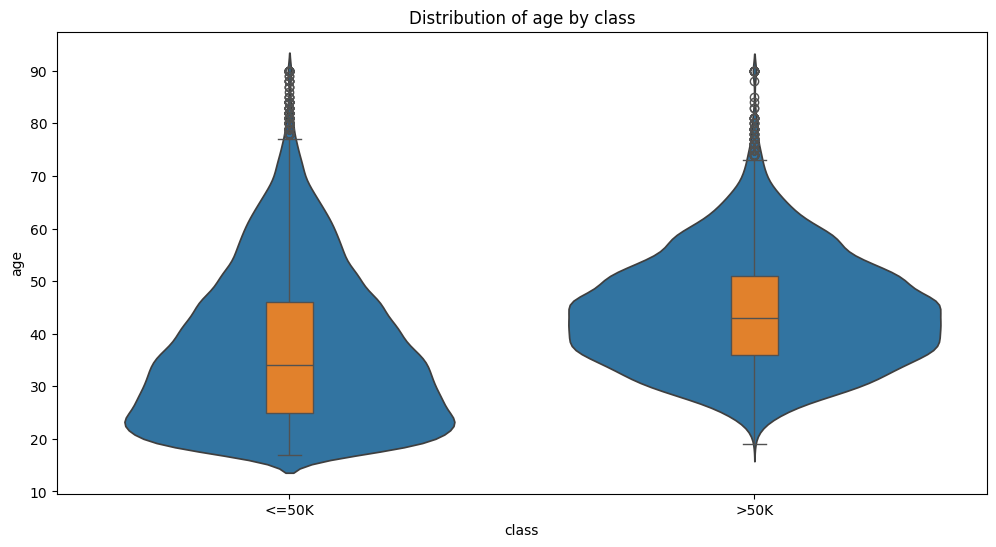

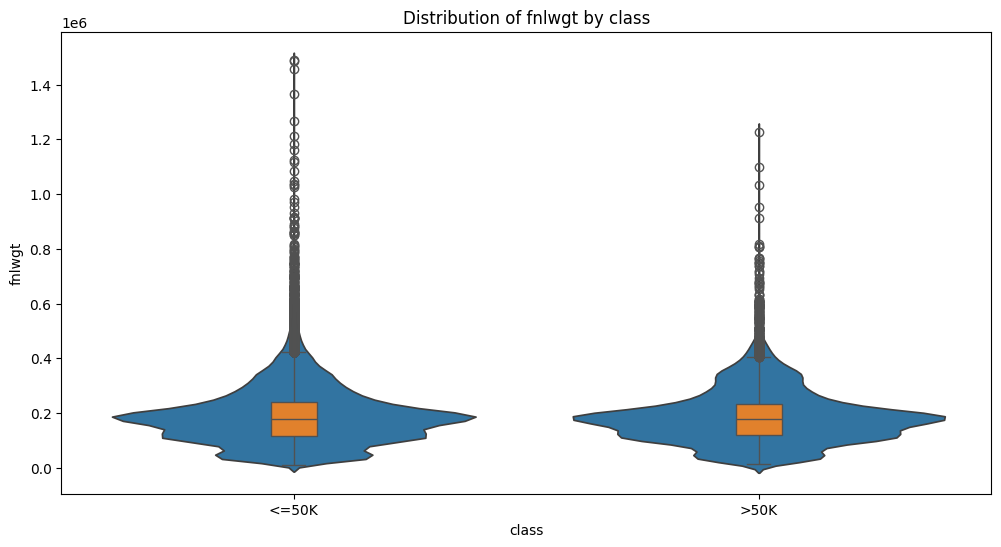

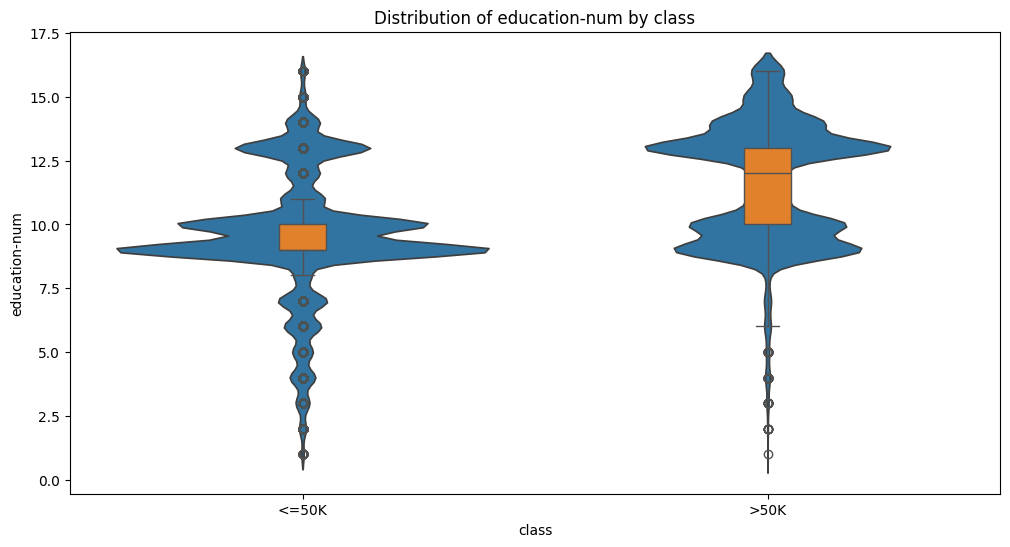

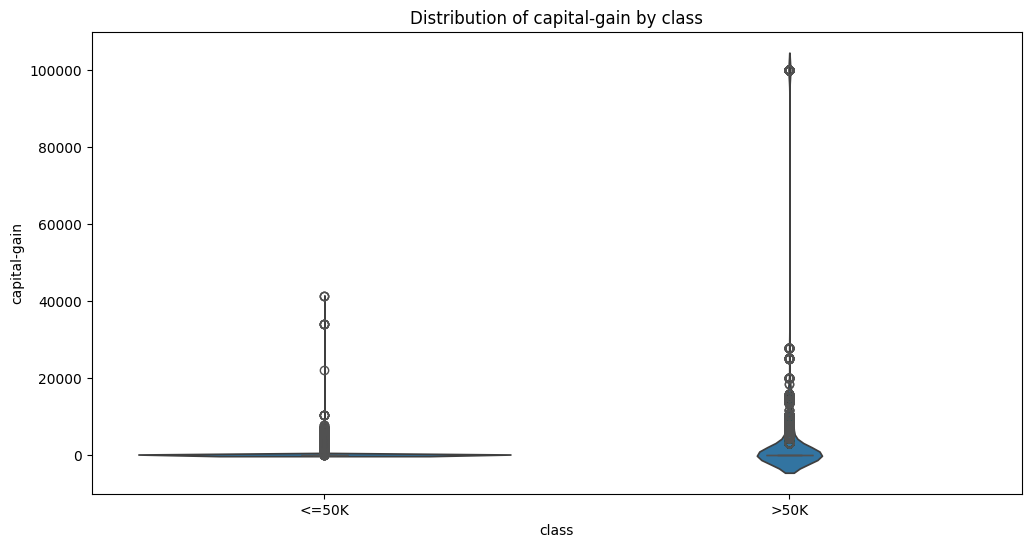

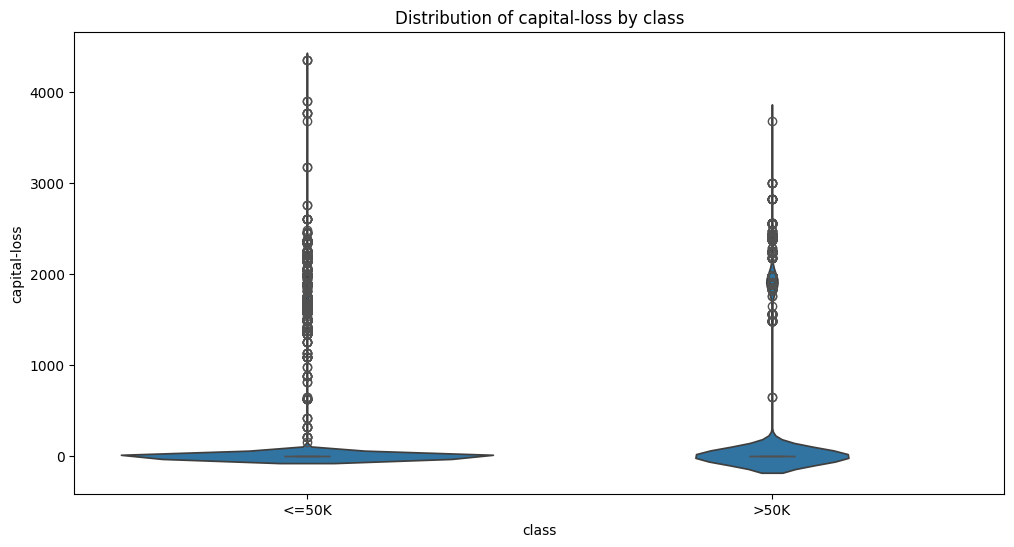

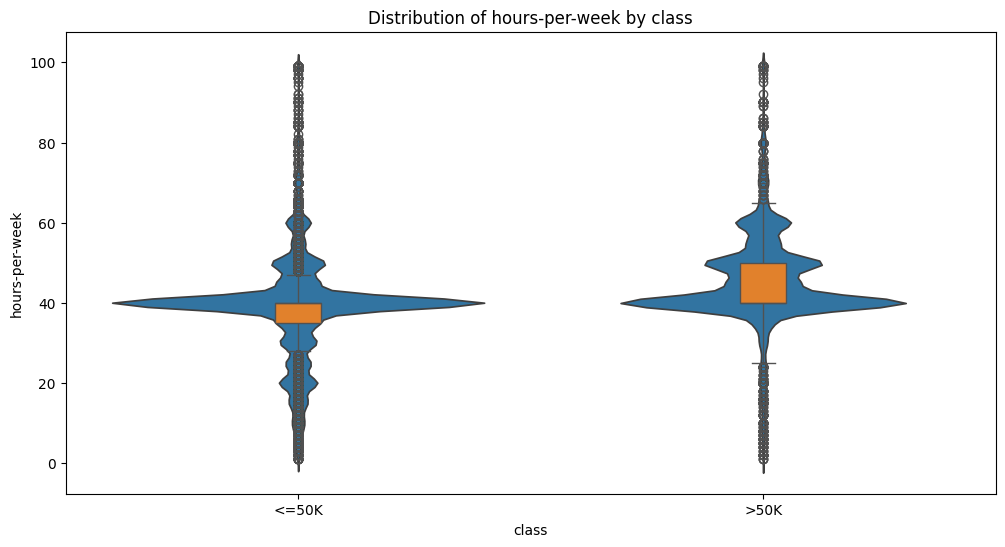

In [7]:
"""
Comparar variables numéricas con la variable por predecir
"""
for var_num in VARS_NUMERICAS:
  plt.figure(figsize = (12, 6))
  sns.violinplot(x = 'class', y = var_num, data = datos, inner = None)
  sns.boxplot(x = 'class', y = var_num, data = datos, width = 0.1)
  plt.title(f'Distribution of {var_num} by class')
  plt.show()

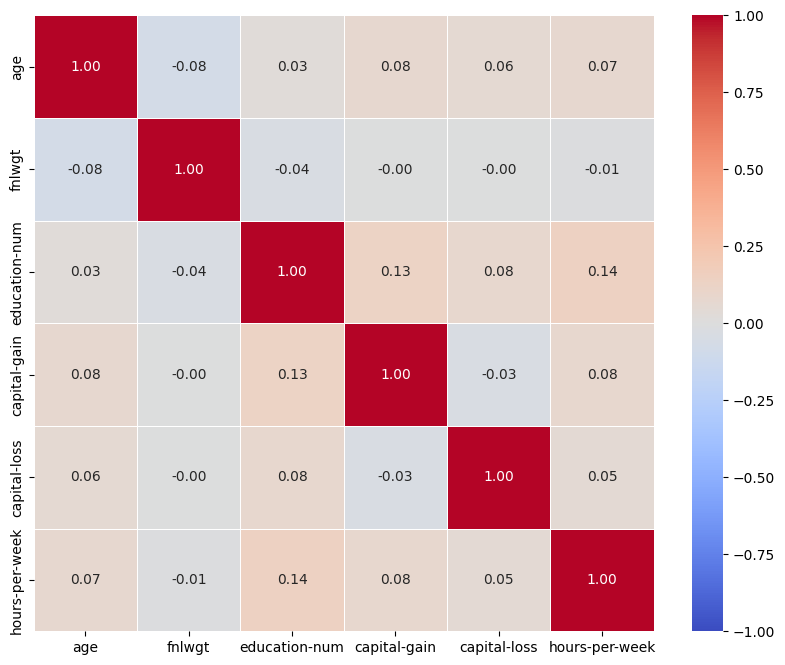

In [8]:
# Correlación entre las variables numéricas
matriz_de_correlaciones = datos[VARS_NUMERICAS].corr()

plt.figure(figsize = (10, 8))
sns.heatmap(
  matriz_de_correlaciones, 
  annot = True, 
  cmap = 'coolwarm', 
  vmin = -1, 
  vmax = 1, 
  fmt = '.2f',
  linewidths = 0.5
)
plt.show()

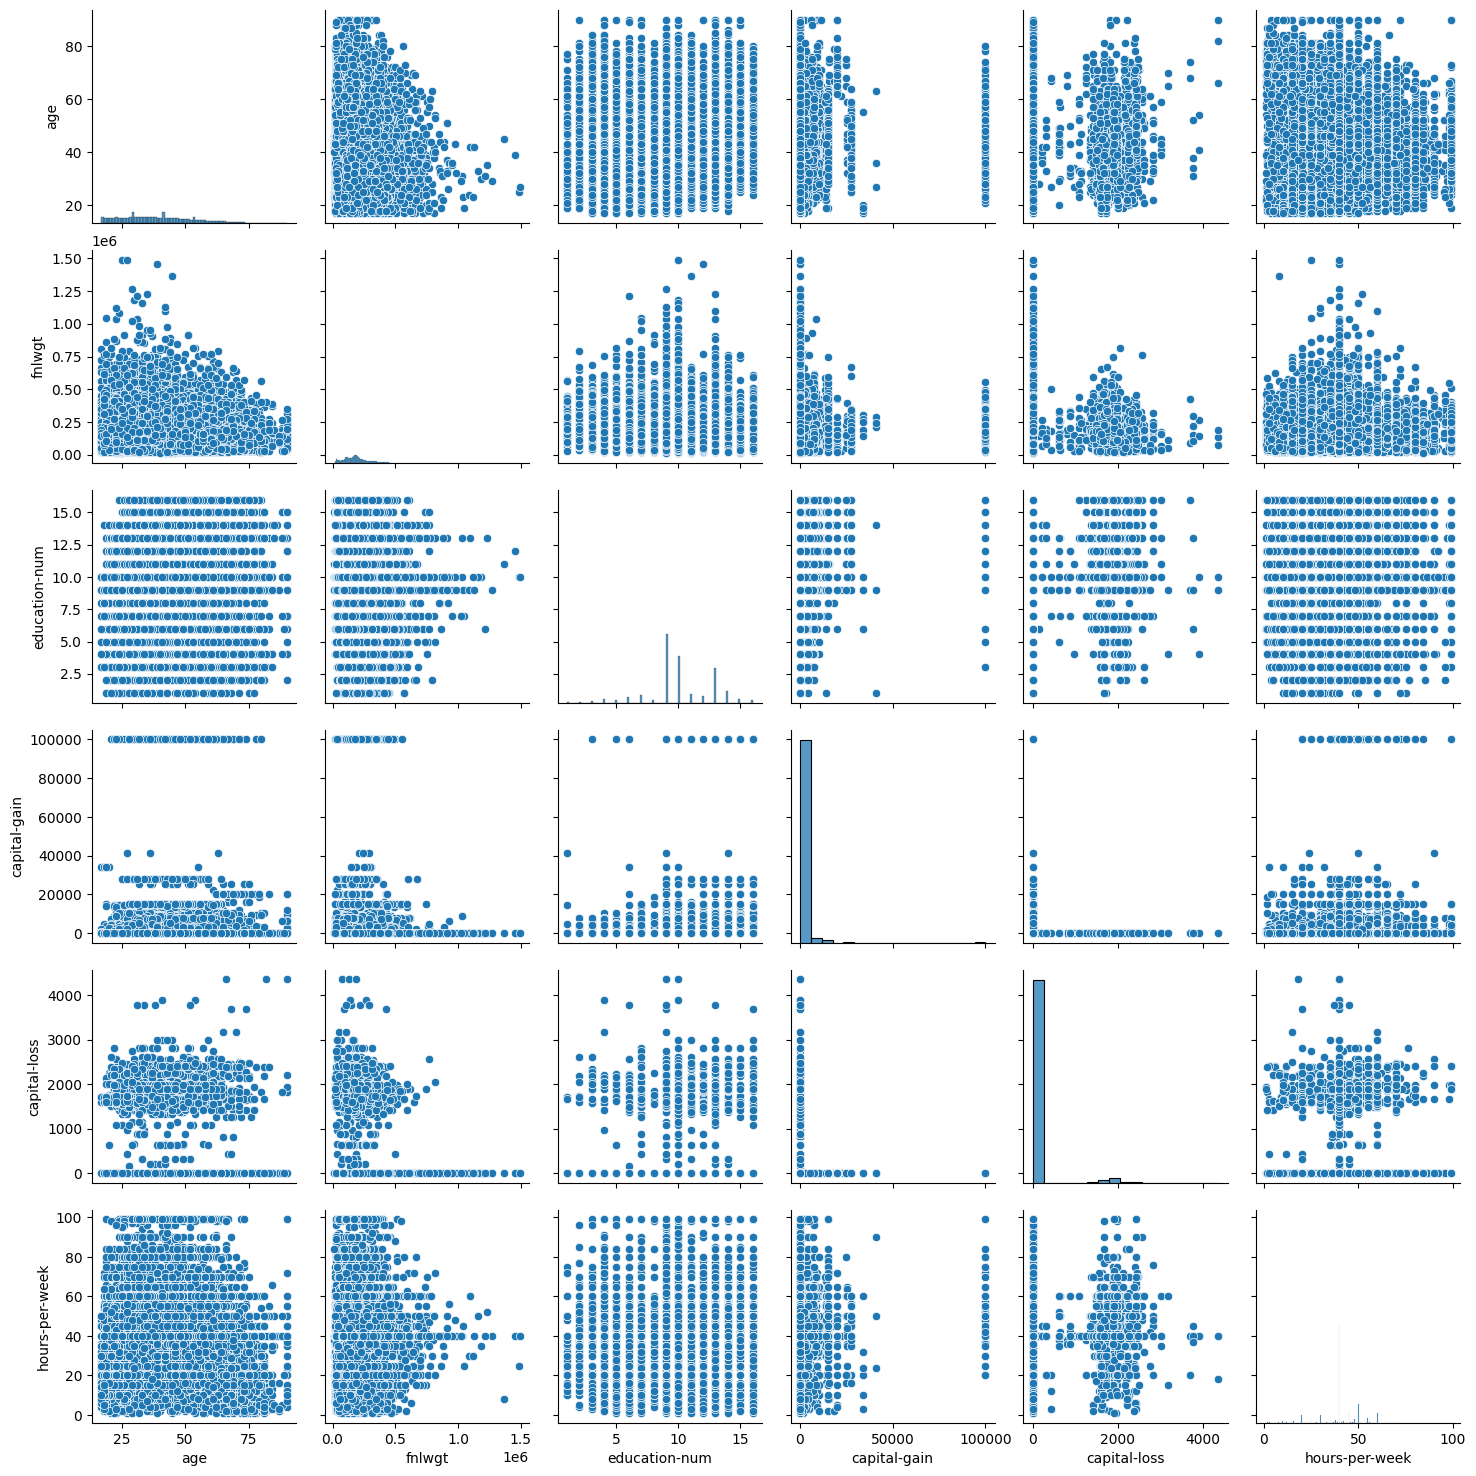

In [9]:
# Gráficos de dispersión entre cada par de variables numéricas
sns.pairplot(datos[VARS_NUMERICAS])